In [1]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image



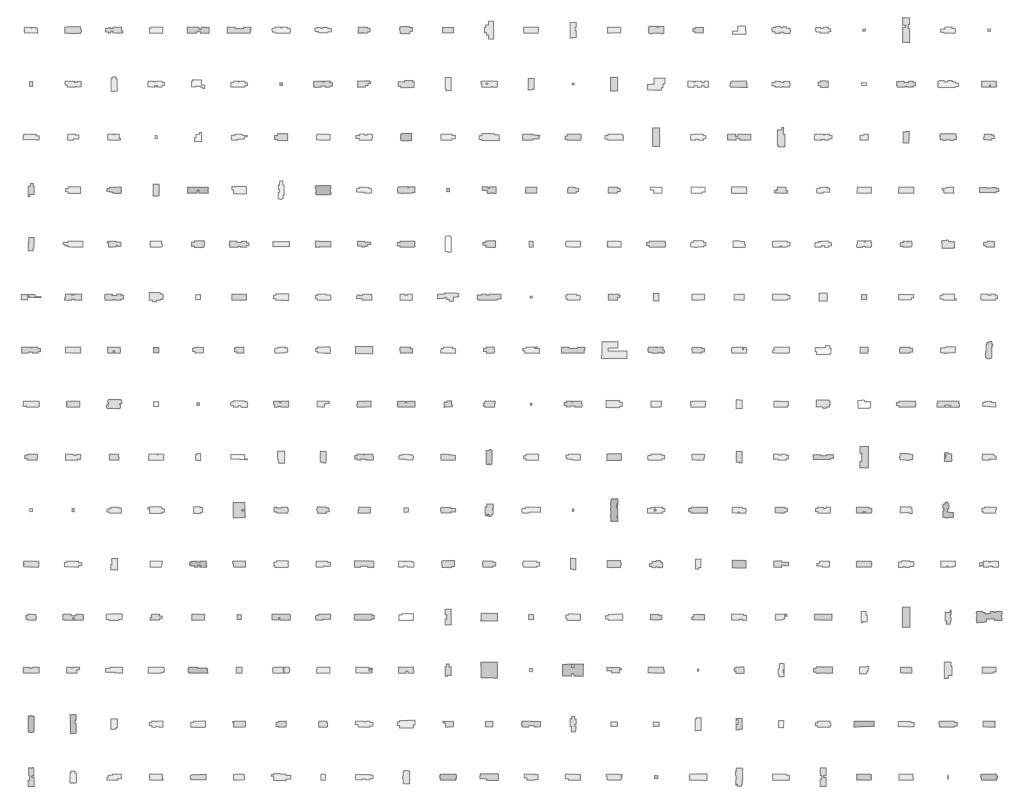

In [32]:
# List all the images in your directory
curr_data = "0_3"
dir_path = f"../data/data_root/past_ver/MARL-BuildingEnergyEstimation-84bc66392c80b92543f1f5924d378279cfa9547b/data/zone_{curr_data}"  # replace with your directory
images = [os.path.join(dir_path, img) for img in os.listdir(dir_path) if img.endswith(".png")]  # or whatever your image format is



row = 15
column = 24
# Randomly select 24 images
selected_images = random.sample(images, row*column)
fig, axes = plt.subplots(row, column, figsize=(10,8))
center = 150
for ax, img_path in zip(axes.flatten(), selected_images):
    # Open image and zoom into the center
    img = Image.open(img_path)
    width, height = img.size
    left = (width - center)/2
    top = (height - center)/2
    right = (width + center)/2
    bottom = (height + center)/2
    img_cropped = img.crop((left, top, right, bottom))

    # Display the image
    ax.imshow(img_cropped)
    ax.axis('off')  # to remove the axis

plt.subplots_adjust(wspace=0, hspace=0)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Save the figure with a transparent background
plt.savefig(f'output_{curr_data}.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

In [46]:
# Define your data
area = [114133.1899, 150848.9982, 278140.9976, 161839.1244, 300956.6619, 39967.43485]
eui = [123, 129.9, 103.4, 97.7, 122.2, 106.1]
objects = ['A', 'B', 'C', 'D', 'E', 'F']
# Create a DataFrame
df = pd.DataFrame({'Area': area, 'EUI': eui, 'Objects': objects})
df

,Area,EUI,Objects
0,114133.18990,123.0,A
1,150848.99820,129.9,B
2,278140.99760,103.4,C
3,161839.12440,97.7,D
4,300956.66190,122.2,E
5,39967.43485,106.1,F


In [48]:
columns = ["labels", "values_a", "values_b", "values_x", "values_y"]
test_data = pd.DataFrame.from_records([("date1", 1, 3, 150, 170),\
                                       ("date2", 2, 6, 200, 180)],\
                                       columns=columns)

# working example but with unreadable values_a and values_b
test_data_melted = pd.melt(test_data, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")
test_data_melted

,labels,source,value_numbers
0,date1,values_a,1
1,date2,values_a,2
2,date1,values_b,3
3,date2,values_b,6
4,date1,values_x,150
5,date2,values_x,200
6,date1,values_y,170
7,date2,values_y,180


In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

columns = ["labels", "values_a", "values_b", "values_x", "values_y"]
test_data = pd.DataFrame.from_records([("date1", 1, 3, 150, 170),\
                                       ("date2", 2, 6, 200, 180)],\
                                       columns=columns)

test_data_melted = pd.melt(test_data, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")
test_data

,labels,values_a,values_b,values_x,values_y
0,date1,1,3,150,170
1,date2,2,6,200,180


C:\Users\vapeu\AppData\Local\Temp\ipykernel_34680\3893248020.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))


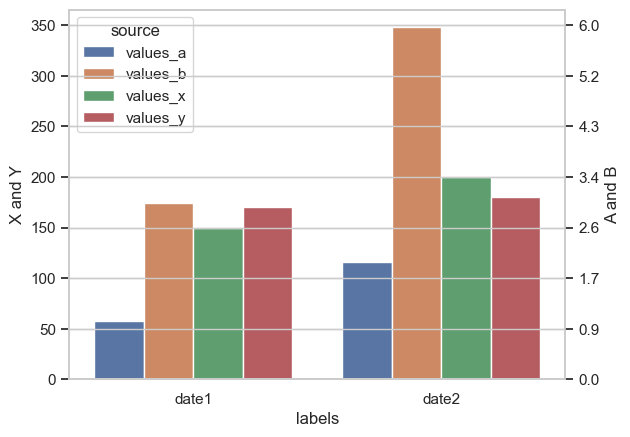

In [52]:
# Scale the data, just a simple example of how you might determine the scaling
mask = test_data_melted.source.isin(['values_a', 'values_b'])
scale = int(test_data_melted[~mask].value_numbers.mean()
            /test_data_melted[mask].value_numbers.mean())
test_data_melted.loc[mask, 'value_numbers'] = test_data_melted.loc[mask, 'value_numbers']*scale

# Plot
fig, ax1 = plt.subplots()
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=test_data_melted, ax=ax1)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('X and Y')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('A and B')

plt.show()

C:\Users\vapeu\AppData\Local\Temp\ipykernel_34680\3240291682.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))


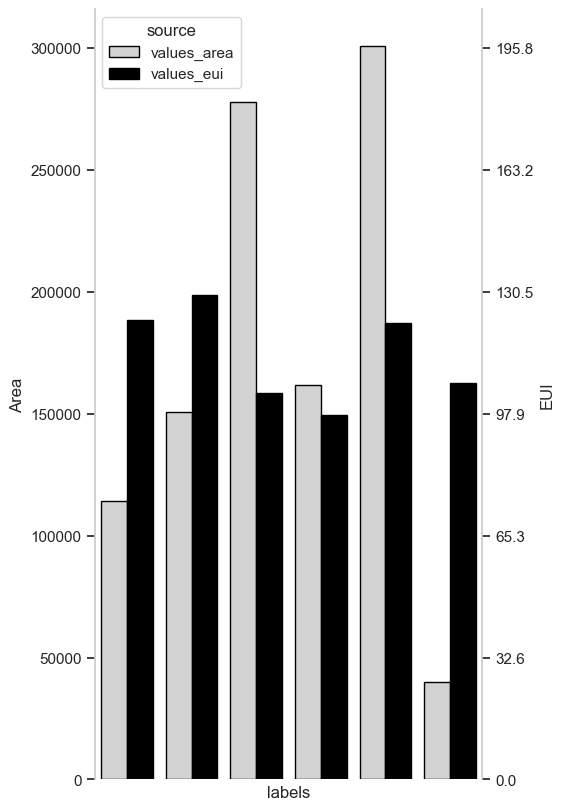

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Your data
area = [114133.1899, 150848.9982, 278140.9976, 161839.1244, 300956.6619, 39967.43485]
eui = [123, 129.9, 103.4, 97.7, 122.2, 106.1]
objects = ['A', 'B', 'C', 'D', 'E', 'F']

# Generate DataFrame
data = pd.DataFrame({
    "labels": objects,
    "values_area": area,
    "values_eui": eui,
})
sns.set_style("whitegrid", {'axes.grid' : False})
# Melt DataFrame
data_melted = pd.melt(data, id_vars="labels", var_name="source", value_name="value_numbers")

# Scale the data
mask = data_melted.source == 'values_eui'
scale = int(data_melted[~mask].value_numbers.mean() / data_melted[mask].value_numbers.mean())
data_melted.loc[mask, 'value_numbers'] = data_melted.loc[mask, 'value_numbers']*scale

# Plot

sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax1 = plt.subplots(figsize=(5, 10))
fig.patch.set_visible(False)
g = sns.barplot(x="labels", y="value_numbers", hue="source", data=data_melted, ax=ax1, 
                  palette=["lightgrey", "black"], edgecolor=['black'], width=0.8)
# g = sns.barplot(x="labels", y="value_numbers", hue="source", data=data_melted, ax=ax1)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Area')
# ax1.axis('off')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('EUI')
# ax2.axis('off')
# For ax1
ax1.set_xticks([])
for spine in ["top", "right", "bottom"]:
    ax1.spines[spine].set_visible(False)

# For ax2
ax2.set_xticks([])
for spine in ["top", "left", "bottom"]:
    ax2.spines[spine].set_visible(False)
plt.legend('',frameon=False)
plt.savefig('final', transparent=True, dpi = 300)